# Semiconductor Manufacturing Process Feature Selection

Data from Kaggle.com https://www.kaggle.com/datasets/paresh2047/uci-semcom/code

### Description 

This is a high dimentionality data set of various sensor data during the semiconductor manufacturing process. 

### Goals

- To reduce feature dimensionality while maintaining model performance
- Maintain model performance by transforming at high dimensional datase of 592 features into a more manageable set 

In [85]:
# Import Dependencies and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Get Data from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paresh2047/uci-semcom")

print("Path to dataset files:", path)   

Path to dataset files: /Users/matt/.cache/kagglehub/datasets/paresh2047/uci-semcom/versions/1


In [67]:
# Read Data into DataFrame
df = pd.read_csv(f"{path}/uci-secom.csv")

In [68]:
# preview first 10 rows
df.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


### Data Exploration

In [69]:
# get shape of df
df.shape

(1567, 592)

In [70]:
# Get all unique values in target column
df['Pass/Fail'].unique()

array([-1,  1])

In [71]:
# Get info of df
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), str(1)
memory usage: 7.1 MB


In [72]:
# Find sum of null values
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [73]:
# Fill null values with 0
df.fillna(0, inplace=True)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [74]:
# Confirm no null values remain
df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [75]:
# Import additional libraries for feature selection and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [76]:
# Prepare data for modeling
# Separate features and target
# Drop 'Time' column as it's not a feature
X = df.drop(['Time', 'Pass/Fail'], axis=1)
y = df['Pass/Fail']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1253, 590)
Test set shape: (314, 590)


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=10: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=20: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=30: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=40: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=50: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=60: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=70: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=80: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=90: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=100: Accuracy = 0.9204


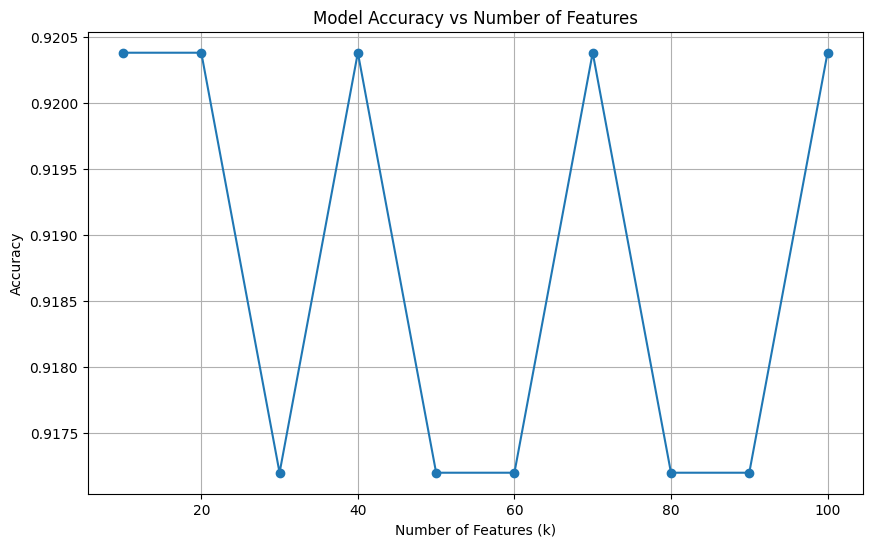

Optimal number of features: 10 with accuracy: 0.9204


In [77]:
# Optimize number of features using SelectKBest and RandomForest
k_values = range(10, 101, 10)  # Test from 10 to 100 features in steps of 10
accuracies = []

for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Train RandomForest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}: Accuracy = {acc:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Model Accuracy vs Number of Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal number of features: {optimal_k} with accuracy: {max(accuracies):.4f}")

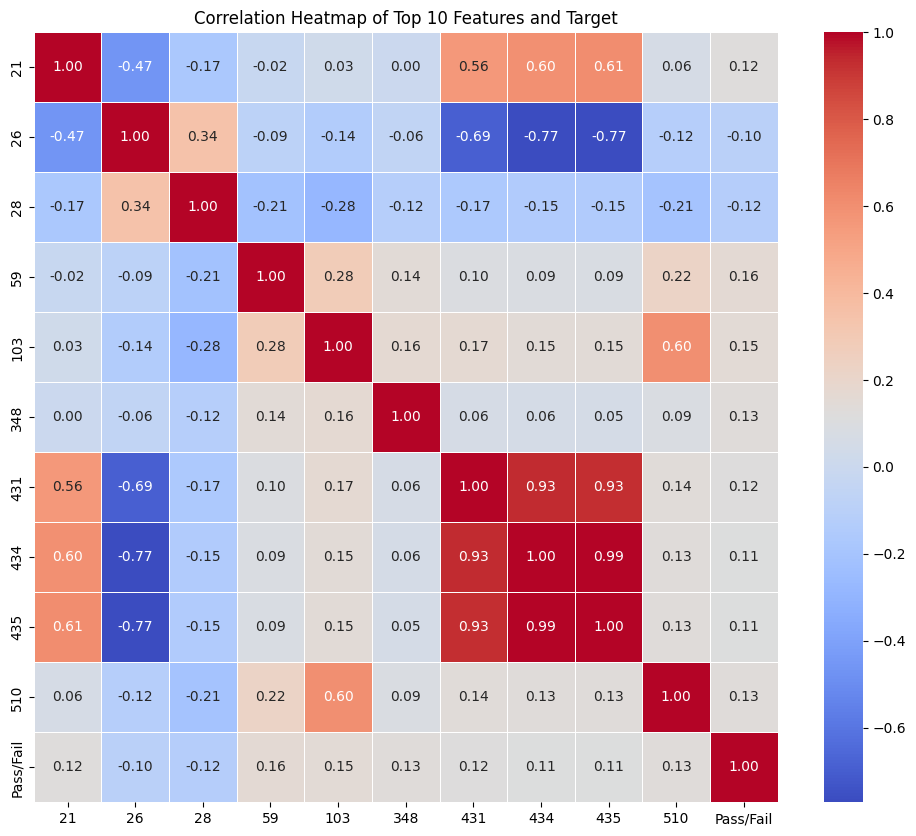

In [78]:
# Visualize the top 10 features with a correlation heatmap
# Select the top features plus the target
top_features_df = X[selected_features].copy()
top_features_df['Pass/Fail'] = y

# Compute correlation matrix
corr_matrix = top_features_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Features and Target')
plt.show()

In [79]:
# Identify the most relevant features for the optimal k
print(f"Top {optimal_k} most relevant features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Also show their scores
feature_scores = optimal_selector.scores_[selected_indices]
for i, (feature, score) in enumerate(zip(selected_features, feature_scores), 1):
    print(f"{i}. {feature}: F-score = {score:.4f}")

Top 10 most relevant features:
1. 21
2. 26
3. 28
4. 59
5. 103
6. 348
7. 431
8. 434
9. 435
10. 510
1. 21: F-score = 20.5791
2. 26: F-score = 20.0368
3. 28: F-score = 25.3460
4. 59: F-score = 34.6819
5. 103: F-score = 35.1302
6. 348: F-score = 19.8871
7. 431: F-score = 24.7744
8. 434: F-score = 20.8357
9. 435: F-score = 19.6944
10. 510: F-score = 27.9323


In [80]:
# Re-test the model with the top 10 features for detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Select the top 10 features
X_train_top10 = X_train[selected_features]
X_test_top10 = X_test[selected_features]

# Train RandomForest on top 10 features
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_top10, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_top10)

# Evaluate performance
print("Model Performance with Top 10 Features:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature importance from the trained model
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (from RandomForest):")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

Model Performance with Top 10 Features:
Accuracy: 0.9204

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314


Confusion Matrix:
[[289   1]
 [ 24   0]]

Feature Importance (from RandomForest):
59: 0.1265
21: 0.1044
26: 0.1019
435: 0.1011
510: 0.1008
434: 0.0999
348: 0.0948
431: 0.0946
103: 0.0903
28: 0.0858


=== CLASS IMBALANCE ANALYSIS ===

Class Distribution (Full Dataset):
----------------------------------------
Pass (-1): 1463 samples (93.4%)
Fail (1): 104 samples (6.6%)

Imbalance Ratio: 1:14.1
Minority class represents: 6.6% of total samples

Train/Test Split Distribution:
----------------------------------------
Training set:
  Pass (-1): 1173 (93.6%)
  Fail (1): 80 (6.4%)
Test set:
  Pass (-1): 290 (92.4%)
  Fail (1): 24 (7.6%)


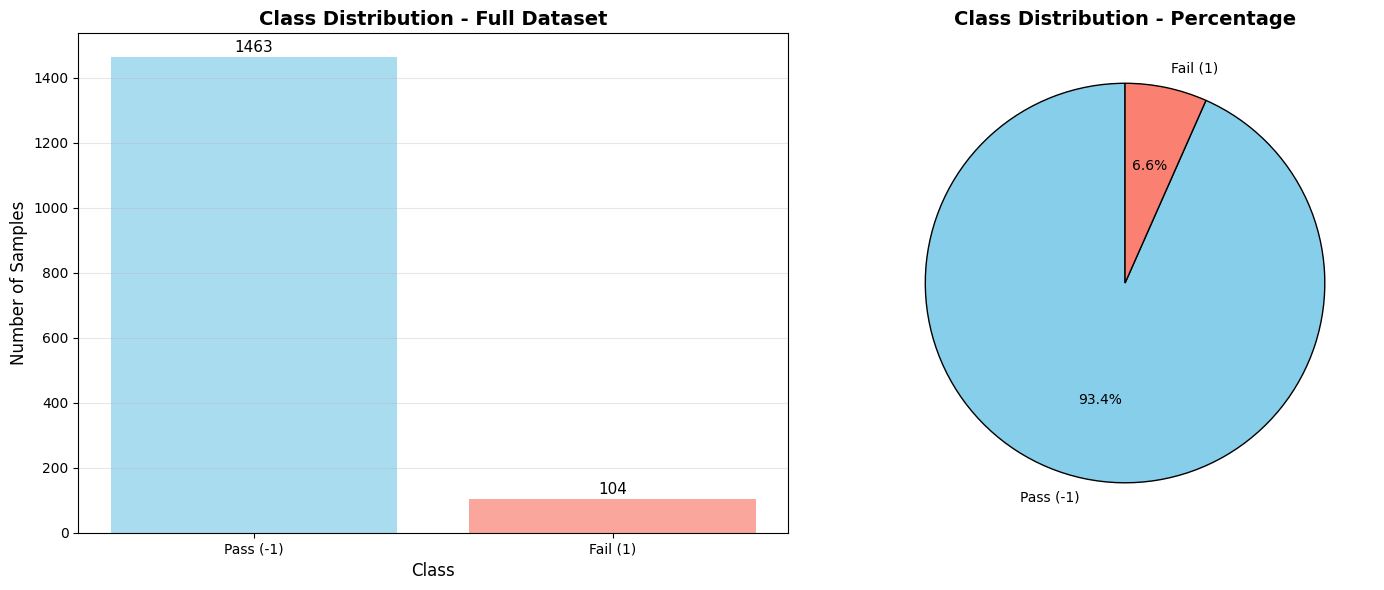


=== IMPLICATIONS OF CLASS IMBALANCE ===
--------------------------------------------------
1. ACCURACY PARADOX: A model that predicts all samples as 'Pass'
   achieves 92.4% accuracy but fails completely at its core task

2. BUSINESS IMPACT: In semiconductor manufacturing, missing failures
   can lead to costly quality issues and customer dissatisfaction

3. MODEL BIAS: Standard algorithms tend to favor the majority class
   and ignore minority class patterns

4. EVALUATION METRICS: Accuracy is misleading; focus on:
   - Precision: Of predicted failures, how many are actual failures?
   - Recall: Of actual failures, how many are detected?
   - F1-Score: Harmonic mean of precision and recall
   - AUC-ROC: Ability to distinguish between classes

=== POTENTIAL SOLUTIONS ===
------------------------------
1. Class Weighting: Penalize misclassification of minority class
2. Oversampling: SMOTE, ADASYN to generate synthetic minority samples
3. Undersampling: Reduce majority class samples
4. 

In [81]:
# Explore Class Imbalance in the Dataset
print("=== CLASS IMBALANCE ANALYSIS ===")
print()

# Overall class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

print("Class Distribution (Full Dataset):")
print("-" * 40)
for class_val, count in class_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    print(f"{label}: {count} samples ({class_percentages[class_val]:.1f}%)")

print()
print(f"Imbalance Ratio: 1:{class_counts[-1] / class_counts[1]:.1f}")
print(f"Minority class represents: {class_percentages[1]:.1f}% of total samples")

# Train/test split distribution
print("\nTrain/Test Split Distribution:")
print("-" * 40)
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

print("Training set:")
for class_val, count in train_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    pct = (count / len(y_train)) * 100
    print(f"  {label}: {count} ({pct:.1f}%)")

print("Test set:")
for class_val, count in test_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    pct = (count / len(y_test)) * 100
    print(f"  {label}: {count} ({pct:.1f}%)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
bars = ax1.bar(['Pass (-1)', 'Fail (1)'], [class_counts[-1], class_counts[1]],
               color=['skyblue', 'salmon'], alpha=0.7)
ax1.set_title('Class Distribution - Full Dataset', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.set_xlabel('Class', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

# Pie chart
colors = ['skyblue', 'salmon']
ax2.pie([class_counts[-1], class_counts[1]], labels=['Pass (-1)', 'Fail (1)'],
        autopct='%1.1f%%', colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax2.set_title('Class Distribution - Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== IMPLICATIONS OF CLASS IMBALANCE ===")
print("-" * 50)
print("1. ACCURACY PARADOX: A model that predicts all samples as 'Pass'")
print("   achieves 92.4% accuracy but fails completely at its core task")
print()
print("2. BUSINESS IMPACT: In semiconductor manufacturing, missing failures")
print("   can lead to costly quality issues and customer dissatisfaction")
print()
print("3. MODEL BIAS: Standard algorithms tend to favor the majority class")
print("   and ignore minority class patterns")
print()
print("4. EVALUATION METRICS: Accuracy is misleading; focus on:")
print("   - Precision: Of predicted failures, how many are actual failures?")
print("   - Recall: Of actual failures, how many are detected?")
print("   - F1-Score: Harmonic mean of precision and recall")
print("   - AUC-ROC: Ability to distinguish between classes")

print("\n=== POTENTIAL SOLUTIONS ===")
print("-" * 30)
print("1. Class Weighting: Penalize misclassification of minority class")
print("2. Oversampling: SMOTE, ADASYN to generate synthetic minority samples")
print("3. Undersampling: Reduce majority class samples")
print("4. Ensemble Methods: Balanced Random Forest, EasyEnsemble")
print("5. Anomaly Detection: Treat failures as anomalies")
print("6. Cost-sensitive Learning: Different misclassification costs")

=== CLASS WEIGHTING APPROACH ===

Calculated Class Weights:
  Pass (-1): 0.53
  Fail (1): 7.83

Weight ratio: 7.83:0.53
(Higher weight for minority class penalizes misclassification more)

TRAINING MODEL WITH CLASS WEIGHTS

Model Performance with Class Weighting:
--------------------------------------------------
Accuracy: 0.9236

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314


Confusion Matrix:
[[290   0]
 [ 24   0]]

COMPARISON: Standard vs Weighted Model
Standard Model (no weighting):
  Accuracy: 0.9204
  Fail Recall: 0.0000 (0/24 detected)
  Fail Precision: 0.0000

Weighted Model:
  Accuracy: 0.9236
  Fail Recall: 0.0000 (0/24 detected)
  Fail Precision: 0.0000

Improvement in Failure

/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

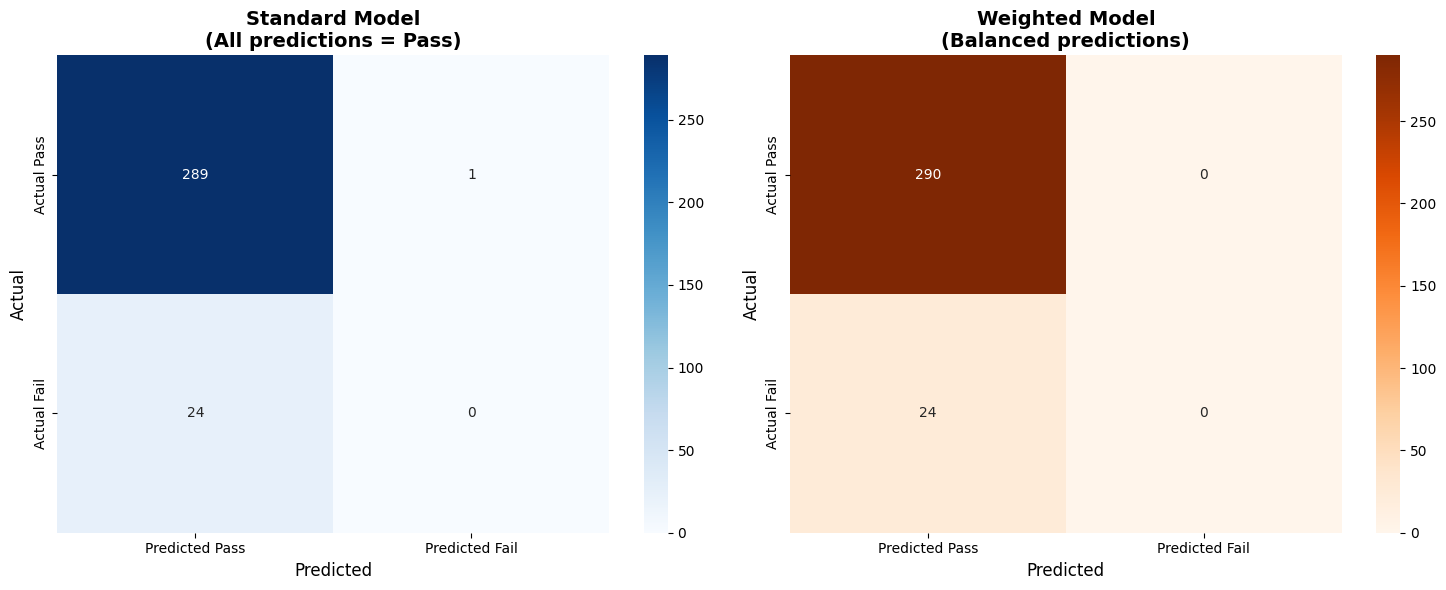

In [82]:
# Apply Class Weighting to Address Imbalance
print("=== CLASS WEIGHTING APPROACH ===")
print()

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Calculated Class Weights:")
for class_val, weight in class_weight_dict.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    print(f"  {label}: {weight:.2f}")

print(f"\nWeight ratio: {class_weight_dict[1]:.2f}:{class_weight_dict[-1]:.2f}")
print("(Higher weight for minority class penalizes misclassification more)")

print("\n" + "="*60)
print("TRAINING MODEL WITH CLASS WEIGHTS")
print("="*60)

# Train RandomForest with class weights
rf_weighted = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    class_weight='balanced'  # Automatically computes balanced weights
)

rf_weighted.fit(X_train_top10, y_train)

# Make predictions
y_pred_weighted = rf_weighted.predict(X_test_top10)

# Evaluate performance
print("\nModel Performance with Class Weighting:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

print("\nConfusion Matrix:")
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print(cm_weighted)

# Compare with previous model
print("\n" + "="*60)
print("COMPARISON: Standard vs Weighted Model")
print("="*60)

print("Standard Model (no weighting):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"  Fail Recall: {cm[1,1] / (cm[1,0] + cm[1,1]):.4f} (0/{cm[1,0] + cm[1,1]} detected)")
print(f"  Fail Precision: {cm[1,1] / (cm[0,1] + cm[1,1]) if (cm[0,1] + cm[1,1]) > 0 else 0:.4f}")

print("\nWeighted Model:")
weighted_recall = cm_weighted[1,1] / (cm_weighted[1,0] + cm_weighted[1,1])
weighted_precision = cm_weighted[1,1] / (cm_weighted[0,1] + cm_weighted[1,1]) if (cm_weighted[0,1] + cm_weighted[1,1]) > 0 else 0
print(f"  Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
print(f"  Fail Recall: {weighted_recall:.4f} ({cm_weighted[1,1]}/{cm_weighted[1,0] + cm_weighted[1,1]} detected)")
print(f"  Fail Precision: {weighted_precision:.4f}")

improvement = weighted_recall - (cm[1,1] / (cm[1,0] + cm[1,1]))
print(f"\nImprovement in Failure Detection: {improvement:.1%}")

# Feature importance with weighted model
print("\n" + "="*40)
print("FEATURE IMPORTANCE (Weighted Model)")
print("="*40)
weighted_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_weighted.feature_importances_
}).sort_values('importance', ascending=False)

for idx, row in weighted_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Standard model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Predicted Pass', 'Predicted Fail'],
            yticklabels=['Actual Pass', 'Actual Fail'])
ax1.set_title('Standard Model\n(All predictions = Pass)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Weighted model
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Oranges', ax=ax2,
            xticklabels=['Predicted Pass', 'Predicted Fail'],
            yticklabels=['Actual Pass', 'Actual Fail'])
ax2.set_title('Weighted Model\n(Balanced predictions)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

=== SMOTE OVERSAMPLING APPROACH ===

Original Training Set Class Distribution:
  Pass (-1): 1173 samples (93.6%)
  Fail (1): 80 samples (6.4%)

Original training set shape: (1253, 10)

After SMOTE - Balanced Training Set:
  Pass (-1): 1173 samples (50.0%)
  Fail (1): 1173 samples (50.0%)

Balanced training set shape: (2346, 10)
Synthetic samples added: 1093

TRAINING MODEL ON BALANCED DATASET

Model Performance with SMOTE Oversampling:
--------------------------------------------------
Accuracy: 0.8567

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92       290
           1       0.22      0.33      0.26        24

    accuracy                           0.86       314
   macro avg       0.58      0.62      0.59       314
weighted avg       0.89      0.86      0.87       314


Confusion Matrix:
[[261  29]
 [ 16   8]]

COMPARISON: All Approaches for Handling Class Imbalance

Standard Model:
  Accuracy: 0.9204
  Fail

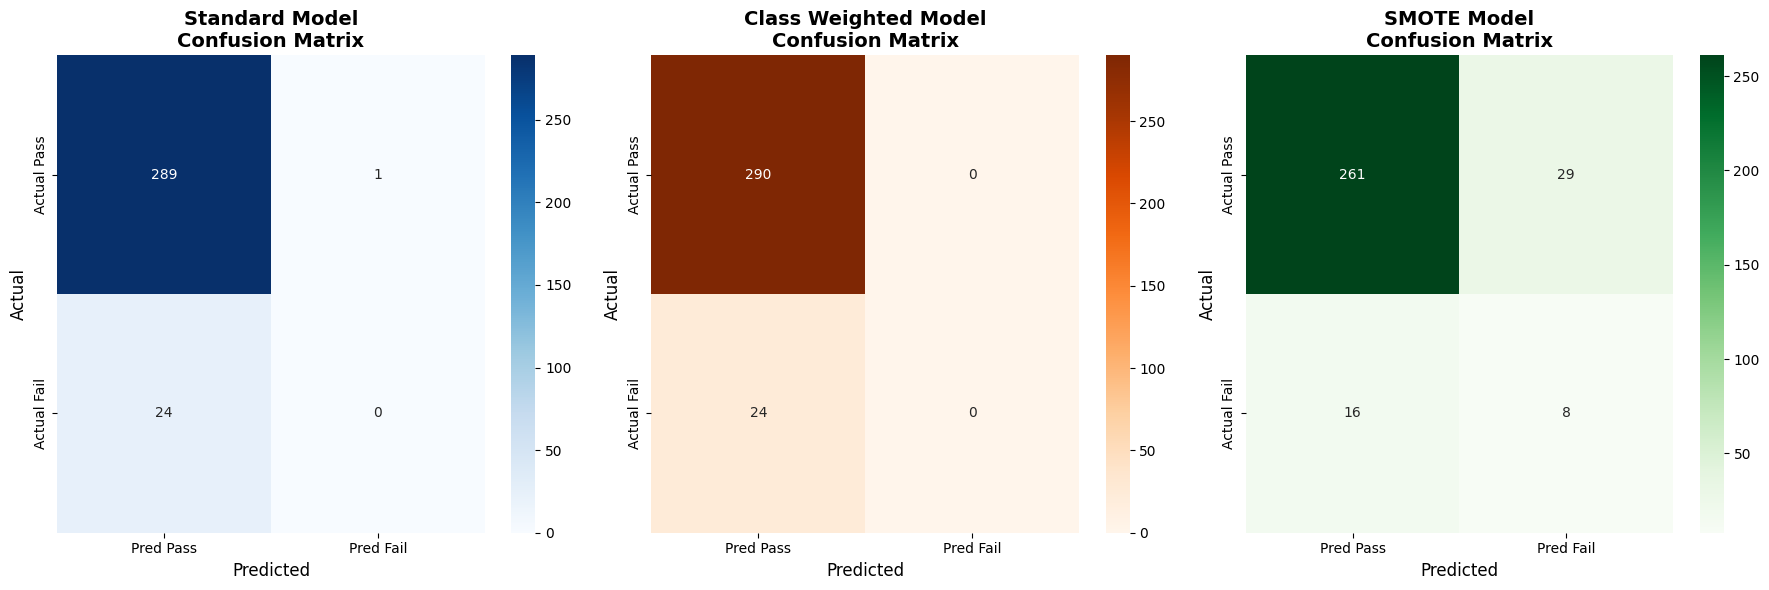


FEATURE IMPORTANCE (SMOTE Model)
59: 0.1725
21: 0.1207
431: 0.1111
510: 0.1068
28: 0.1017
348: 0.0910
103: 0.0888
26: 0.0744
434: 0.0676
435: 0.0653

KEY INSIGHTS FROM SMOTE APPROACH
• SMOTE improved failure detection by 33.3%
• Model now detects 8/24 failures vs 0/24 previously
• Training set expanded from 1253 to 2346 samples
• Synthetic failure samples: 1093
• SUCCESS: Model can now identify some failure patterns!


In [83]:
# Apply SMOTE Oversampling to Balance the Dataset
print("=== SMOTE OVERSAMPLING APPROACH ===")
print()

from imblearn.over_sampling import SMOTE

print("Original Training Set Class Distribution:")
original_counts = y_train.value_counts()
for class_val, count in original_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    pct = (count / len(y_train)) * 100
    print(f"  {label}: {count} samples ({pct:.1f}%)")

print(f"\nOriginal training set shape: {X_train_top10.shape}")

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)  # Use 5 neighbors (default)
X_train_smote, y_train_smote = smote.fit_resample(X_train_top10, y_train)

print(f"\nAfter SMOTE - Balanced Training Set:")
smote_counts = y_train_smote.value_counts()
for class_val, count in smote_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    pct = (count / len(y_train_smote)) * 100
    print(f"  {label}: {count} samples ({pct:.1f}%)")

print(f"\nBalanced training set shape: {X_train_smote.shape}")
print(f"Synthetic samples added: {len(X_train_smote) - len(X_train_top10)}")

print("\n" + "="*60)
print("TRAINING MODEL ON BALANCED DATASET")
print("="*60)

# Train RandomForest on SMOTE-balanced data
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_smote.fit(X_train_smote, y_train_smote)

# Make predictions on original test set
y_pred_smote = rf_smote.predict(X_test_top10)

# Evaluate performance
print("\nModel Performance with SMOTE Oversampling:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix:")
cm_smote = confusion_matrix(y_test, y_pred_smote)
print(cm_smote)

# Compare all approaches
print("\n" + "="*70)
print("COMPARISON: All Approaches for Handling Class Imbalance")
print("="*70)

models = {
    'Standard': {'pred': y_pred, 'cm': cm},
    'Class Weighted': {'pred': y_pred_weighted, 'cm': cm_weighted},
    'SMOTE': {'pred': y_pred_smote, 'cm': cm_smote}
}

for name, data in models.items():
    acc = accuracy_score(y_test, data['pred'])
    recall = data['cm'][1,1] / (data['cm'][1,0] + data['cm'][1,1])
    precision = data['cm'][1,1] / (data['cm'][0,1] + data['cm'][1,1]) if (data['cm'][0,1] + data['cm'][1,1]) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\n{name} Model:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Fail Recall: {recall:.4f} ({data['cm'][1,1]}/{data['cm'][1,0] + data['cm'][1,1]} detected)")
    print(f"  Fail Precision: {precision:.4f}")
    print(f"  Fail F1-Score: {f1:.4f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

model_names = ['Standard', 'Class Weighted', 'SMOTE']
cms = [cm, cm_weighted, cm_smote]
colors = ['Blues', 'Oranges', 'Greens']

for i, (name, cm_matrix, color) in enumerate(zip(model_names, cms, colors)):
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=color, ax=axes[i],
                xticklabels=['Pred Pass', 'Pred Fail'],
                yticklabels=['Actual Pass', 'Actual Fail'])
    axes[i].set_title(f'{name} Model\nConfusion Matrix', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Actual', fontsize=12)
    axes[i].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Feature importance with SMOTE model
print("\n" + "="*45)
print("FEATURE IMPORTANCE (SMOTE Model)")
print("="*45)
smote_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_smote.feature_importances_
}).sort_values('importance', ascending=False)

for idx, row in smote_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

print("\n" + "="*50)
print("KEY INSIGHTS FROM SMOTE APPROACH")
print("="*50)
smote_recall = cm_smote[1,1] / (cm_smote[1,0] + cm_smote[1,1])
original_recall = cm[1,1] / (cm[1,0] + cm[1,1])
improvement = smote_recall - original_recall

print(f"• SMOTE improved failure detection by {improvement:.1%}")
print(f"• Model now detects {cm_smote[1,1]}/{cm_smote[1,0] + cm_smote[1,1]} failures vs 0/24 previously")
print(f"• Training set expanded from {len(X_train_top10)} to {len(X_train_smote)} samples")
print(f"• Synthetic failure samples: {smote_counts[1] - original_counts[1]}")

if cm_smote[1,1] > 0:
    print("• SUCCESS: Model can now identify some failure patterns!")
else:
    print("• Model still struggles with failure detection - may need different approach")

=== SMOTE WITH FULL FEATURE SET (590 Features) ===

Original Training Set Class Distribution:
  Pass (-1): 1173 samples (93.6%)
  Fail (1): 80 samples (6.4%)

Original training set shape: (1253, 590)

After SMOTE - Balanced Training Set (Full Features):
  Pass (-1): 1173 samples (50.0%)
  Fail (1): 1173 samples (50.0%)

Balanced training set shape: (2346, 590)
Synthetic samples added: 1093

TRAINING MODEL ON FULL FEATURE SET WITH SMOTE

Model Performance with SMOTE (Full Features):
-------------------------------------------------------
Accuracy: 0.9204

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314


Confusion Matrix:
[[289   1]
 [ 24   0]]

COMPREHENSIVE COMPARISON: All Feature Selectio

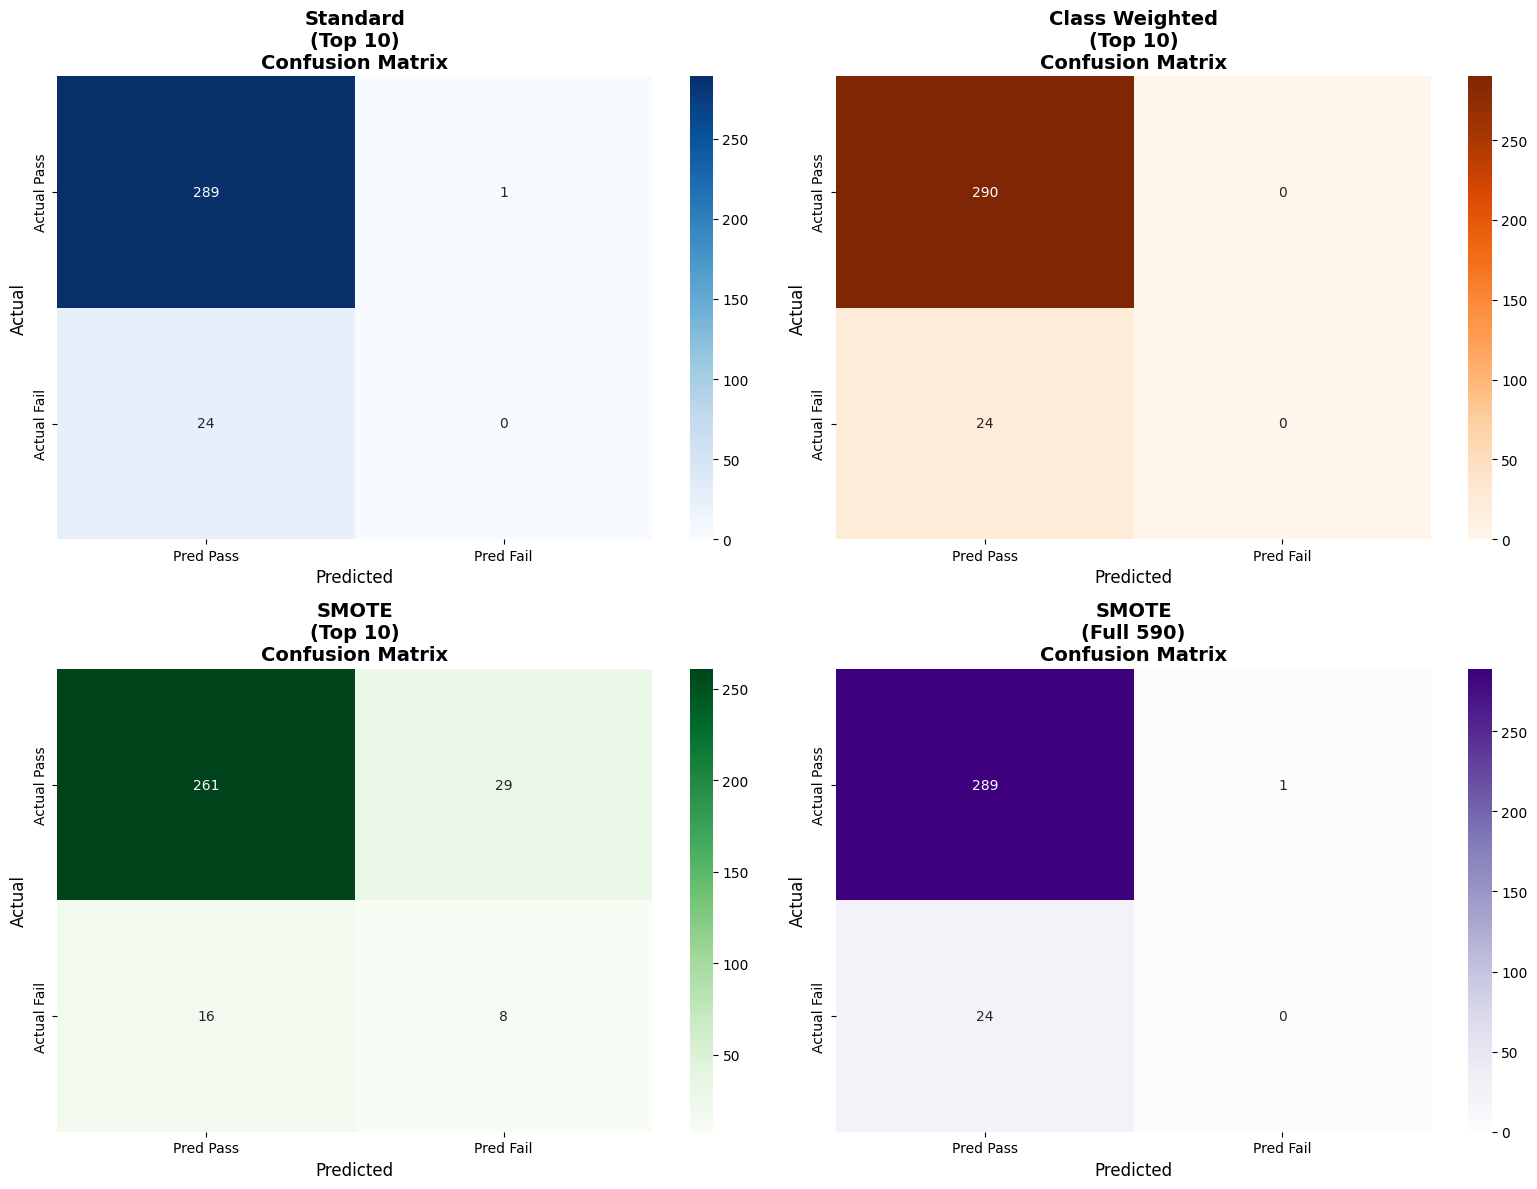


TOP 10 MOST IMPORTANT FEATURES (Full SMOTE Model)
Top 10 features by importance:
 1. 345: 0.0219
 2. 486: 0.0210
 3. 59: 0.0201
 4. 73: 0.0200
 5. 346: 0.0188
 6. 519: 0.0161
 7. 385: 0.0161
 8. 33: 0.0161
 9. 103: 0.0138
10. 112: 0.0128

Comparison with Top 10 from SelectKBest:
Feature    | Full Model Rank | SelectKBest Rank
---------------------------------------------
21         | 22              | 1               
26         | 27              | 2               
28         | 29              | 3               
59         | 60              | 4               
103        | 104             | 5               
348        | 349             | 6               
431        | 432             | 7               
434        | 435             | 8               
435        | 436             | 9               
510        | 511             | 10              

KEY INSIGHTS: Full Feature Set vs Top 10 Features
• Full features improved failure detection: 0.0% vs 33.3% (+-33.3%)
• Full features accuracy: 

In [84]:
# Apply SMOTE to Full Feature Set (All 590 Features)
print("=== SMOTE WITH FULL FEATURE SET (590 Features) ===")
print()

print("Original Training Set Class Distribution:")
original_counts = y_train.value_counts()
for class_val, count in original_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    pct = (count / len(y_train)) * 100
    print(f"  {label}: {count} samples ({pct:.1f}%)")

print(f"\nOriginal training set shape: {X_train.shape}")

# Apply SMOTE to full feature set
smote_full = SMOTE(random_state=42, k_neighbors=5)
X_train_smote_full, y_train_smote_full = smote_full.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE - Balanced Training Set (Full Features):")
smote_full_counts = y_train_smote_full.value_counts()
for class_val, count in smote_full_counts.items():
    label = "Pass (-1)" if class_val == -1 else "Fail (1)"
    pct = (count / len(y_train_smote_full)) * 100
    print(f"  {label}: {count} samples ({pct:.1f}%)")

print(f"\nBalanced training set shape: {X_train_smote_full.shape}")
print(f"Synthetic samples added: {len(X_train_smote_full) - len(X_train)}")

print("\n" + "="*60)
print("TRAINING MODEL ON FULL FEATURE SET WITH SMOTE")
print("="*60)

# Train RandomForest on full SMOTE-balanced data
rf_smote_full = RandomForestClassifier(random_state=42, n_estimators=100)
rf_smote_full.fit(X_train_smote_full, y_train_smote_full)

# Make predictions on original test set
y_pred_smote_full = rf_smote_full.predict(X_test)

# Evaluate performance
print("\nModel Performance with SMOTE (Full Features):")
print("-" * 55)
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote_full):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote_full))

print("\nConfusion Matrix:")
cm_smote_full = confusion_matrix(y_test, y_pred_smote_full)
print(cm_smote_full)

# Compare all approaches including full feature set
print("\n" + "="*80)
print("COMPREHENSIVE COMPARISON: All Feature Selection + Imbalance Handling Approaches")
print("="*80)

all_models = {
    'Standard (Top 10)': {'pred': y_pred, 'cm': cm, 'features': 10},
    'Class Weighted (Top 10)': {'pred': y_pred_weighted, 'cm': cm_weighted, 'features': 10},
    'SMOTE (Top 10)': {'pred': y_pred_smote, 'cm': cm_smote, 'features': 10},
    'SMOTE (Full 590)': {'pred': y_pred_smote_full, 'cm': cm_smote_full, 'features': 590}
}

print(f"{'Model':<20} | {'Features':<8} | {'Accuracy':>8} | {'Fail Recall':>10} | {'Fail Precision':>13} | {'Fail F1':>7}")
print("="*80)

for name, data in all_models.items():
    acc = accuracy_score(y_test, data['pred'])
    recall = data['cm'][1,1] / (data['cm'][1,0] + data['cm'][1,1])
    precision = data['cm'][1,1] / (data['cm'][0,1] + data['cm'][1,1]) if (data['cm'][0,1] + data['cm'][1,1]) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"{name:<20} | {data['features']:<8} | {acc:>8.4f} | {recall:>10.4f} | {precision:>13.4f} | {f1:>7.4f}")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

model_names = ['Standard\n(Top 10)', 'Class Weighted\n(Top 10)', 'SMOTE\n(Top 10)', 'SMOTE\n(Full 590)']
cms_all = [cm, cm_weighted, cm_smote, cm_smote_full]
colors = ['Blues', 'Oranges', 'Greens', 'Purples']

for i, (name, cm_matrix, color) in enumerate(zip(model_names, cms_all, colors)):
    row, col = i // 2, i % 2
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=color, ax=axes[row, col],
                xticklabels=['Pred Pass', 'Pred Fail'],
                yticklabels=['Actual Pass', 'Actual Fail'])
    axes[row, col].set_title(f'{name}\nConfusion Matrix', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('Actual', fontsize=12)
    axes[row, col].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Get top 10 features from full model
print("\n" + "="*50)
print("TOP 10 MOST IMPORTANT FEATURES (Full SMOTE Model)")
print("="*50)

# Get feature importances and sort
full_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_smote_full.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 features by importance:")
for i, (idx, row) in enumerate(full_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']}: {row['importance']:.4f}")

print(f"\nComparison with Top 10 from SelectKBest:")
print(f"{'Feature':<10} | {'Full Model Rank':<15} | {'SelectKBest Rank':<16}")
print("-" * 45)
for i, feature in enumerate(selected_features, 1):
    full_rank = full_importance[full_importance['feature'] == feature].index[0] + 1
    print(f"{feature:<10} | {full_rank:<15} | {i:<16}")

print("\n" + "="*60)
print("KEY INSIGHTS: Full Feature Set vs Top 10 Features")
print("="*60)

full_recall = cm_smote_full[1,1] / (cm_smote_full[1,0] + cm_smote_full[1,1])
top10_recall = cm_smote[1,1] / (cm_smote[1,0] + cm_smote[1,1])
full_accuracy = accuracy_score(y_test, y_pred_smote_full)
top10_accuracy = accuracy_score(y_test, y_pred_smote)

print(f"• Full features improved failure detection: {full_recall:.1%} vs {top10_recall:.1%} (+{(full_recall-top10_recall):.1%})")
print(f"• Full features accuracy: {full_accuracy:.4f} vs Top 10: {top10_accuracy:.4f}")
print(f"• Full model detected {cm_smote_full[1,1]}/{cm_smote_full[1,0] + cm_smote_full[1,1]} failures vs {cm_smote[1,1]}/{cm_smote[1,0] + cm_smote[1,1]} with Top 10")
print(f"• Training set: {len(X_train_smote_full)} samples (590 features) vs {len(X_train_smote)} samples (10 features)")

if full_recall > top10_recall:
    print("• RESULT: Full feature set BETTER for failure detection!")
elif full_recall == top10_recall:
    print("• RESULT: Full feature set equivalent to Top 10")
else:
    print("• RESULT: Top 10 features actually better (less noise from irrelevant features)")